# INFO 213: Data Science Programming 2
___

### Week 4: Naive Bayes and Probability
___

### 9:30-10:50am, Mon. July 16, and Wed. July 18, 2018
---

**Question:**
- How to do fast and straigthforward probabilistic predictions?


**Objectives:**
- Define the problem of using conditional probabilities for classification
- Describe the assumptions in Naive Bayes classification
- Estimate the prior probabilities for Naive Bayes classification
- Explain smoothing techiques in estimation
- Implement Naive Bayes classification from scratch
- Apply Naive Bayes methods in the Scikit Learn package

## Introduction

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data.

**Naive Assumption** Given a lable L and a set of data containing n features. The event "the data contains a feature $f_i$ is independent of the events of the data containing any other features". In other words, the features of the data are mutually independent. With the properties of conditional probabilities, we can write $P(f_1, f_2, ..., f_n|L) = P(f_1|L)\times P(f_2|L)\times ...\times P(f_n|L)$. 

### A Really Dumb Spam Filter

Imagine a “universe” that consists of receiving a message chosen randomly from all
possible messages. Let S be the event “the message is spam” and V be the event “the
message contains the word viagra” and R be the event "the message contains the word Rolex.". Then Bayes’s Theorem tells us that the probability
that the message is spam conditional on containing the word viagra and Rolex is:

$P(S|V, R) = \frac{P(V, R|S)\times P(S)}{P(V, R)}$

By the Naive assumption, we can write it as:

$P(S|V, R) = \frac{P(V, R|S)\times P(S)}{P(V, R)} = \frac{P(V|S)\times P(R|S)\times P(S)}{P(V, R)}$

Given a set of spaming and non-spamming emails, we can estimate the quantities $P(V|S)$, $P(R|S)$, $P(S)$, and $P(V, R)$ by counting the number of occurences of each event. 

## Probability
It is hard to do data science without some sort of understanding of probability and its
mathematics. For our purposes you should think of probability as a way of quantifying the uncertainty
associated with events chosen from a some universe of events. The universe
consists of all possible outcomes. And any subset of these outcomes is an event; for
example, “the die rolls a one” or “the die rolls an even number.”

Notationally, we write $P(E)$ to mean “the probability of the event $E$.”
We’ll use probability theory to build models. We’ll use probability theory to evaluate
models. We’ll use probability theory all over the place.

### Dependence and Independence
Roughly speaking, we say that two events E and F are dependent if knowing something
about whether E happens gives us information about whether F happens (and
vice versa). Otherwise they are independent.

Mathematically, we say that two events E and F are independent if the probability that
they both happen is the product of the probabilities that each one happens:

$P(E, F) = P(E)\times P(F)$

### Properties of Probability
Given a set of possible events $S$. The probabilities of events in $S$ must satisfy the following properties:
1. $P(a) \geq 0$ for $a\in S$
2. $\sum_{a\in S} P(a) = 1$

### Conditional Probability
When two events E and F are independent, then by definition we have:

$P(E, F) = P(E)\times P(F)$

If they are not necessarily independent (and if the probability of F is not zero), then
we define the probability of E “conditional on F” as:

$P(E|F) = P(E, F) /P(F)$

You should think of this as the probability that E happens, given that we know that F happens.
We often rewrite this as:

$P(E, F) = P(E|F)\times P(F)$

When E and F are independent, you can check that this gives:

$P(E|F) = P(E)$

which is the mathematical way of expressing that knowing F occurred gives us no
additional information about whether E occurred.

### Example 
One common tricky example involves a family with two (unknown) children.
If we assume that:
1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

then the event “no girls” has probability 1/4, the event “one girl, one boy” has probability
1/2, and the event “two girls” has probability 1/4.

OK. Let us consider the following two events:
1. what is the probability of the event “both children are girls” (B) conditional
on the event “the older child is a girl” (G)? 
2. what is the probability of the event “both children are girls” conditional
on the event “at least one of the children is a girl” (L)?

If you have gotten the answers, let us simulate the events and check your answers.

```
import random
def random_kid():
    return random.choice(["boy", "girl"])```

In [1]:
import random
def random_kid():
    return random.choice(["boy", "girl"])

```
both_girls = 0
older_girl = 0
either_girl = 0
girl_boy = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
    if younger != older:
        girl_boy += 1```

In [2]:
both_girls = 0
older_girl = 0
either_girl = 0
girl_boy = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
    if younger != older:
        girl_boy += 1

```
print('The probability of "both children are girls (B) conditional on the event the older child is a girl (G)" is: ' + \
     str(both_girls / older_girl))```

In [3]:
print('The probability of "both children are girls (B) conditional on the event the older child is a girl (G)" is: ' + \
     str(both_girls / older_girl))

The probability of "both children are girls (B) conditional on the event the older child is a girl (G)" is: 0.5007089325501317


```
print('The probability of "both children are girls (B) conditional on the event at least one of the children is a girl (L)" is: ' + \
     str(both_girls / either_girl))```

In [4]:
print('The probability of "both children are girls (B) conditional on the event at least one of the children is a girl (L)" is: ' + \
     str(both_girls / either_girl))

The probability of "both children are girls (B) conditional on the event at least one of the children is a girl (L)" is: 0.3311897106109325


```
print('The probability of "one boy one girl (D) conditional on the event one child is a girl (L)" is: ' + \
     str(girl_boy / either_girl))```

In [5]:
print('The probability of "one boy one girl (D) conditional on the event one child is a girl (L)" is: ' + \
     str(girl_boy / either_girl))

The probability of "one boy one girl (D) conditional on the event one child is a girl (L)" is: 0.6688102893890675


#### Why is it that if you know one child is girl then having another child as boy is twice as likely as having another girl?

### Bayes’s Theorem
One of the data scientist’s best friends is Bayes’s Theorem, which is a way of “reversing”
conditional probabilities. Let’s say we need to know the probability of some event
E conditional on some other event F occurring. But we only have information about
the probability of F conditional on E occurring. Using the definition of conditional
probability twice tells us that:

$P(E|F) = P(E, F) /P(F) = P(F|E) P(E) /P(F)$

The event F can be split into the two mutually exclusive events “F and E” and “F and
not E.” If we write ¬E for “not E” (i.e., “E doesn’t happen”), then:

$P(F) = P(F, E) + P(F, ¬E)$

so that:

$P(E|F) = P(F|E) P(E) / P(F|E) P(E) + P(F|¬E) P(¬E)$

which is how Bayes’s Theorem is often stated.

#### Exercise
Imagine a certain disease that affects 1 in every 10,000 people. And imagine
that there is a test for this disease that gives the correct result (“diseased” if you have
the disease, “nondiseased” if you don’t) 99% of the time. What is the probability of a person having the disease if the person has a positive test? 

### Random Variables
A random variable is a variable whose possible values have an associated probability
distribution. A very simple random variable equals 1 if a coin flip turns up heads and
0 if the flip turns up tails. 

### Expected Value
The expected value $E[X]$ of a random varaible $X$ is the average value of $X$ weighted by its probabilities:

$E[X]$ = $P(X = x_{1}) x_{1}$ $+ P(X=x_{2}) x_{2}+...+P(X=x_{n}) x_{n}$

### Variance
The variance of a random variable $X$ is the expected value of the squared deviation from the mean of $X$, $\mu= E[X]$:

$Var(X) = E[(X-\mu)^2]$

### Standard Deviation
Standard deviation is the squred root of variance

### Continuous Distributions
A coin flip corresponds to a discrete distribution—one that associates positive probability
with discrete outcomes. Often we’ll want to model distributions across a continuum
of outcomes. (For our purposes, these outcomes will always be real numbers,
although that’s not always the case in real life.) For example, the uniform distribution
puts equal weight on all the numbers between 0 and 1.

Because there are infinitely many numbers between 0 and 1, this means that the
weight it assigns to individual points must necessarily be zero. For this reason, we
represent a continuous distribution with a probability density function (pdf) such that
the probability of seeing a value in a certain interval equals the integral of the density
function over the interval.

We will often be more interested in the cumulative distribution function (cdf), which
gives the probability that a random variable is less than or equal to a certain value.

#### Exercise
Write functions for the probability density function and the cumulative distribtuion function of the uniform distribution.

### The Normal Distribution
The normal distribution is the king of distributions. It is the classic bell curve–shaped
distribution and is completely determined by two parameters: its mean $\mu$ and its
standard deviation $\sigma$. The mean indicates where the bell is centered, and the
standard deviation how “wide” it is.

It has the distribution function:

$f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} \exp (-\frac{(x − \mu)^2}{2\sigma^2})$

which we can implement as:

```
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))```

In [2]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

```
import math
import matplotlib.pyplot as plt
%matplotlib inline
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize = (15, 9))
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.grid()
plt.show()```

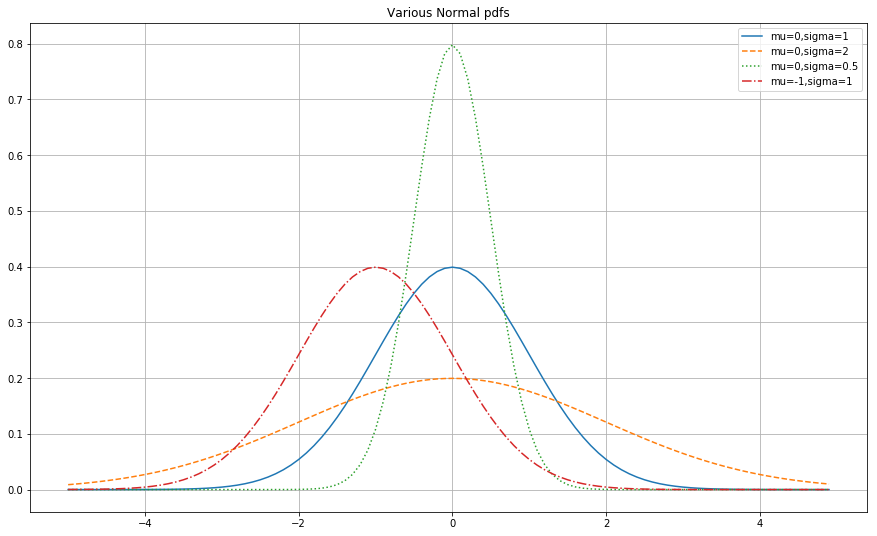

In [3]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize = (15, 9))
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.grid()
plt.show()

When $\mu = 0$ and $\sigma = 1$, it’s called the standard normal distribution. If Z is a standard
normal random variable, then it turns out that:

$X = \sigma Z + \mu$

is also normal but with mean $\mu$ and standard deviation $\sigma$. Conversely, if X is a normal
random variable with mean $\mu$ and standard deviation $\sigma$,

$Z = (X − \mu) /\sigma$

is a standard normal variable -- **Rescalling**

### The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem, which
says (in essence) that a random variable defined as the average of a large number of
independent and identically distributed random variables is itself approximately normally
distributed.

In particular, if $x_{1}, ..., x_{n}$ are random variables with mean $\mu$ and standard deviation $\sigma$,
and if n is large, then:

$(x_{1} + ... + x_{n})/n$

is approximately normally distributed with mean $\mu$ and standard deviation $\sigma / \sqrt{(n)}$.
Equivalently (but often more usefully),

$\frac{(x_{1} + ... + x_{n}) − \mu n}{\sigma \sqrt{(n)}}$

is approximately normally distributed with mean 0 and standard deviation 1.

### Example
An easy way to illustrate this is by looking at binomial random variables, which have
two parameters n and p. A Binomial(n,p) random variable is simply the sum of n
independent Bernoulli(p) random variables, each of which equals 1 with probability p
and 0 with probability 1 − p:

```
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))```

The mean of a Bernoulli(p) variable is $p$, and its standard deviation is $p(1 − p)$. The
central limit theorem says that as n gets large, a Binomial(n,p) variable is approximately
a normal random variable with mean $\mu = np$ and standard deviation
$\sigma = \sqrt{np(1 − p)}$ . If we plot both, you can easily see the resemblance:

```
from collections import Counter
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.figure(figsize=(15, 9))
    plt.bar([x - 0.4 for x in histogram.keys()], \
    [v / num_points for v in histogram.values()], \
    0.8, \
    color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    #plt.figure(figsize=(15,9))
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.grid()
    plt.show()```

```
make_hist(0.75, 100, 10000)```